In [ ]:
#| hide
from circadian import *

# Circadian

> Tools for the simulation and analysis of circadian rhythms

## Install

```sh
pip install circadian
```

## How to use

The below shows how to simulate a slam shift schedule for three models and make an actogram plot

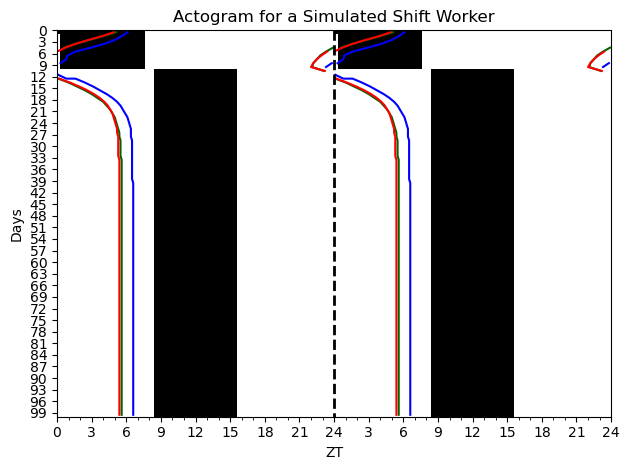

In [ ]:
# Example run for forger 99 vdp model

from circadian.plots import Actogram
from circadian.models import *
from circadian.lights import *

import matplotlib.pyplot as plt
import numpy as np


ts =  np.arange(0.0, 24*100, 0.1)
light_values = np.array([SlamShift(t, Intensity=150.0) for t in ts])
model = Forger99Model()
spm_model = SinglePopModel()
tpm_model = TwoPopulationModel()
initial_conditions_forger = model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
initial_conditions_spm = spm_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
initial_conditions_tpm = tpm_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
dlmo = model.integrate_observer(ts=ts, light_est=light_values, u0 = initial_conditions_forger)
dlmo_spm = spm_model.integrate_observer(ts=ts, light_est=light_values, u0 = initial_conditions_spm)
dlmo_tpm = tpm_model.integrate_observer(ts=ts, light_est=light_values, u0 = initial_conditions_tpm)

sol = tpm_model.integrate_model(ts=ts, light_est=light_values, state=initial_conditions_tpm)
acto = Actogram(ts, light_vals=light_values, opacity=1.0)
acto.plot_phasemarker(dlmo, color='blue', label= "DLMO Forger99")
acto.plot_phasemarker(dlmo_spm, color='darkgreen', label = "DLMO SPM" )
acto.plot_phasemarker(dlmo_tpm, color='red', label = "DLMO TPM" )
plt.title("Actogram for a Simulated Shift Worker")
plt.tight_layout()
plt.show()


